In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


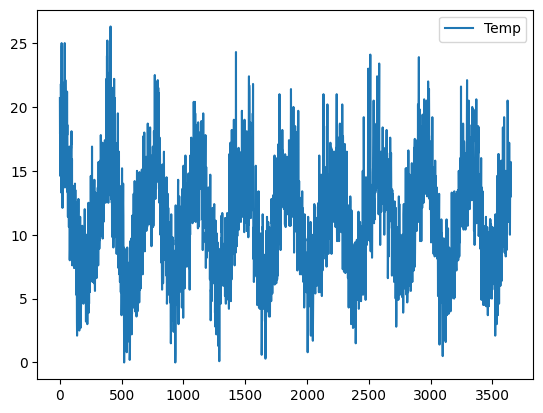

In [17]:
df=pd.read_csv("Downloads/min_temp.csv")
print(df.head())
df.plot()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [20]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())
df.info()


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [21]:
print(df.loc['1981-01-05','Temp'])

15.8


In [22]:
df_1985=df.loc['1981']
print(df_1985)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1981-12-27  15.5
1981-12-28  13.3
1981-12-29  15.6
1981-12-30  15.2
1981-12-31  17.4

[365 rows x 1 columns]


In [23]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [24]:
df['Month']=df.index.month
df['DayOfWeek']=df.index.dayofweek
df['year']=df.index.year
df['Day']=df.index.day


In [26]:
#lag, rolling(mean,std), expanding(mean,std)
df['lag1']=df['Temp'].shift(1)
df['lag2']=df['Temp'].shift(2)
df['rolling_mean3']=df['Temp'].rolling(window=3).mean()
df['rolling_std3']=df['Temp'].rolling(window=3).std()
df['exp_mean']=df['Temp'].expanding().mean()
df['exp_std']=df['Temp'].expanding().std()
df.head()

,Temp,Month,DayOfWeek,year,Day,lag1,lag2,rolling_mean3,rolling_std3,exp_mean,exp_std
Date,,,,,,,,,,,
1981-01-01,20.7,1,3,1981,1,NaN,NaN,NaN,NaN,20.700000,NaN
1981-01-02,17.9,1,4,1981,2,20.7,NaN,NaN,NaN,19.300000,1.979899
1981-01-03,18.8,1,5,1981,3,17.9,20.7,19.133333,1.429452,19.133333,1.429452
1981-01-04,14.6,1,6,1981,4,18.8,17.9,17.100000,2.211334,18.000000,2.549510
1981-01-05,15.8,1,0,1981,5,14.6,18.8,16.400000,2.163331,17.560000,2.417230


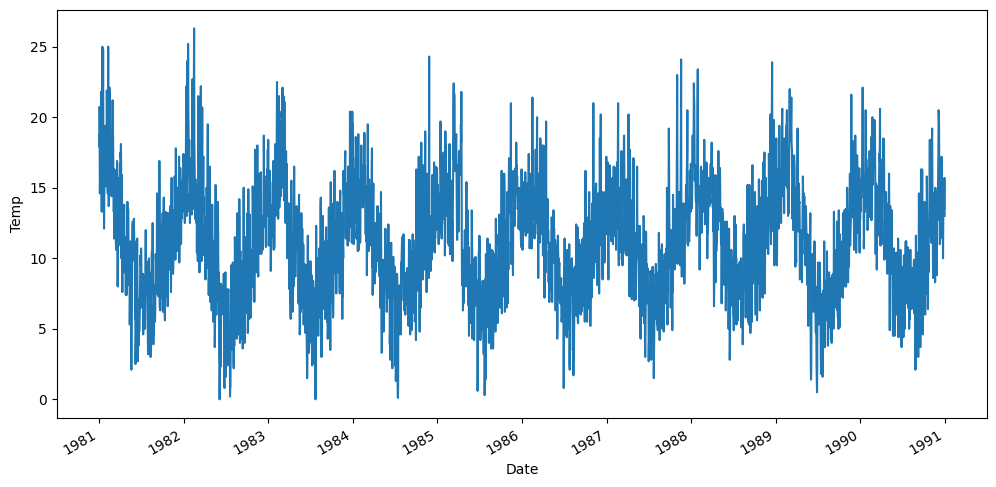

In [28]:
#plotting data
plt.figure(figsize=(12,6))
df['Temp'].plot()
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

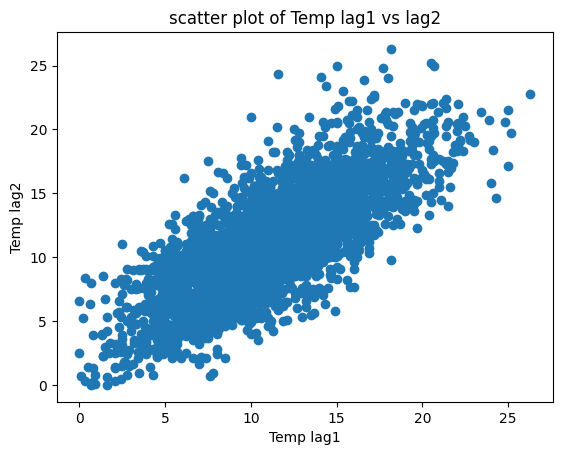

In [30]:
#scatter plot of lag1 and lag2
plt.scatter(df['lag1'],df['lag2'])
plt.title('scatter plot of Temp lag1 vs lag2')
plt.xlabel('Temp lag1')
plt.ylabel('Temp lag2')
plt.show()

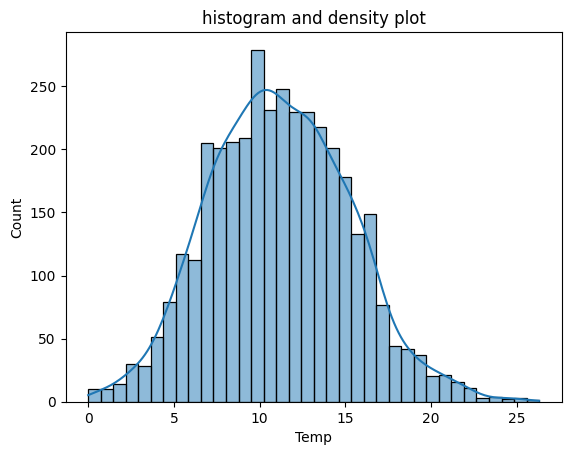

In [39]:
#histogram and density plot
import seaborn as sns
sns.histplot(df['Temp'],kde=True)
plt.title('histogram and density plot')
plt.show()

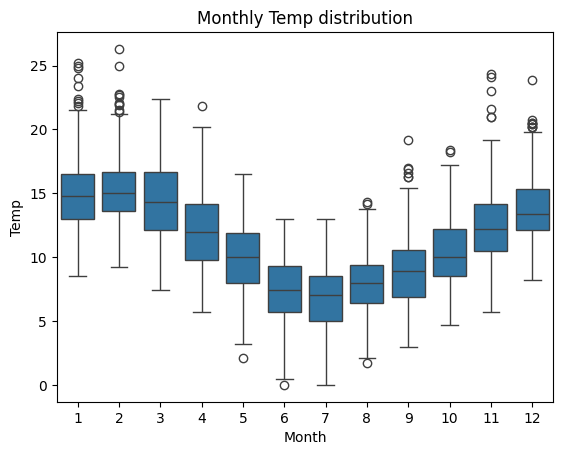

In [40]:
#box plot
import seaborn as sns
sns.boxplot(x='Month', y='Temp', data=df)
plt.title('Monthly Temp distribution')
plt.show()

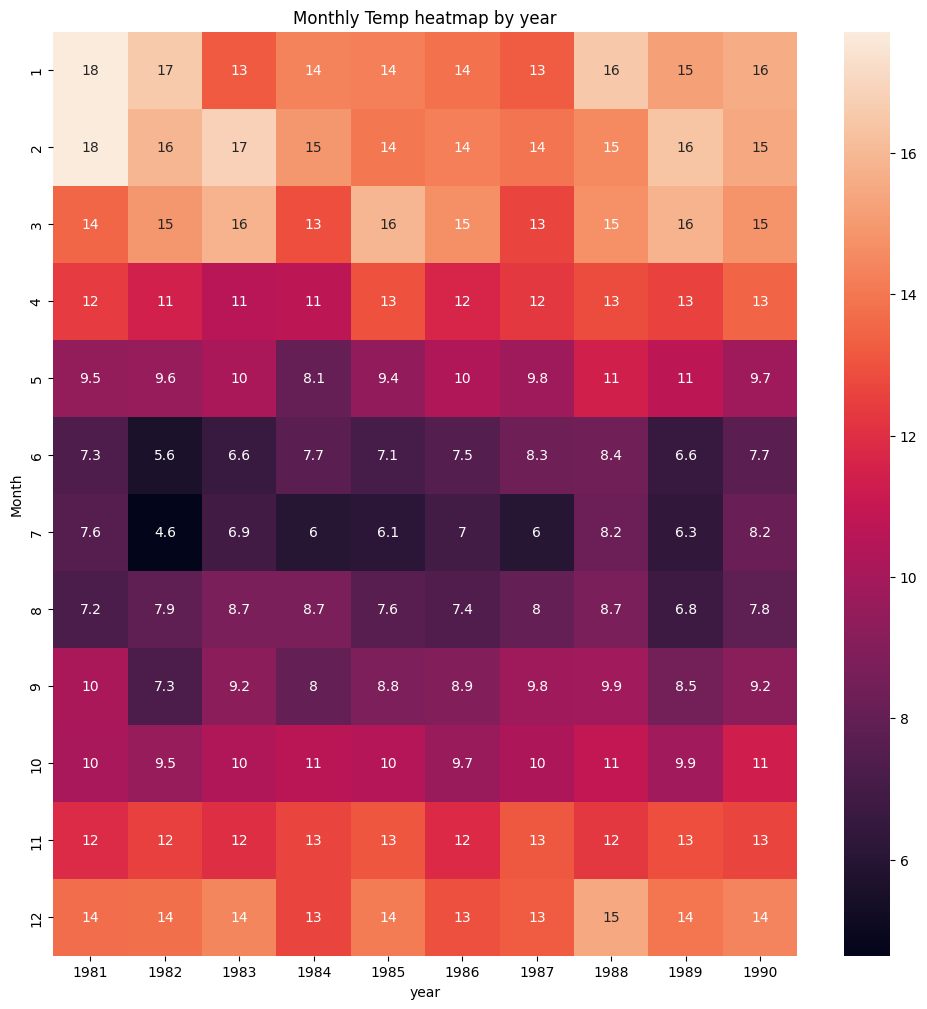

In [41]:
plt.figure(figsize=(12,12))
pivot=df.pivot_table(index='Month', columns='year', values='Temp')
sns.heatmap(pivot, annot=True)
plt.title('Monthly Temp heatmap by year')
plt.show()

In [55]:
#upsampling to hourly
df_hourly=df['Temp'].resample('H').asfreq()
df_hourly

Date
1981-01-01 00:00:00    20.7
1981-01-01 01:00:00     NaN
1981-01-01 02:00:00     NaN
1981-01-01 03:00:00     NaN
1981-01-01 04:00:00     NaN
                       ... 
1990-12-30 20:00:00     NaN
1990-12-30 21:00:00     NaN
1990-12-30 22:00:00     NaN
1990-12-30 23:00:00     NaN
1990-12-31 00:00:00    13.0
Freq: H, Name: Temp, Length: 87625, dtype: float64

In [56]:
#interpolate means filling the missing values after upsampling using linear
df_hourly_interp=df_hourly.interpolate(methods='linear')
df_hourly_interp

Date
1981-01-01 00:00:00    20.700000
1981-01-01 01:00:00    20.583333
1981-01-01 02:00:00    20.466667
1981-01-01 03:00:00    20.350000
1981-01-01 04:00:00    20.233333
                         ...    
1990-12-30 20:00:00    13.450000
1990-12-30 21:00:00    13.337500
1990-12-30 22:00:00    13.225000
1990-12-30 23:00:00    13.112500
1990-12-31 00:00:00    13.000000
Freq: H, Name: Temp, Length: 87625, dtype: float64

In [58]:
df_monthly=df['Temp'].resample('M').mean()
df_monthly

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

In [59]:
year_avg=df['Temp'].resample('Y').mean()
year_avg

Date
1981-12-31    11.517260
1982-12-31    10.783562
1983-12-31    11.187397
1984-12-31    10.591781
1985-12-31    11.137534
1986-12-31    10.803288
1987-12-31    10.853151
1988-12-31    11.972055
1989-12-31    11.261918
1990-12-31    11.669589
Freq: A-DEC, Name: Temp, dtype: float64

In [61]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(df['Temp'].dropna())
print("ADF statistic:", adf_result[0])
print("p-value:",adf_result[1])

ADF statistic: -4.44480492461168
p-value: 0.0002470826300361191


In [62]:
if adf_result[1]<0.05:
    print("no need to do differencing")
else:
    df['Temp_diff']=df['Temp'].diff()

no need to do differencing


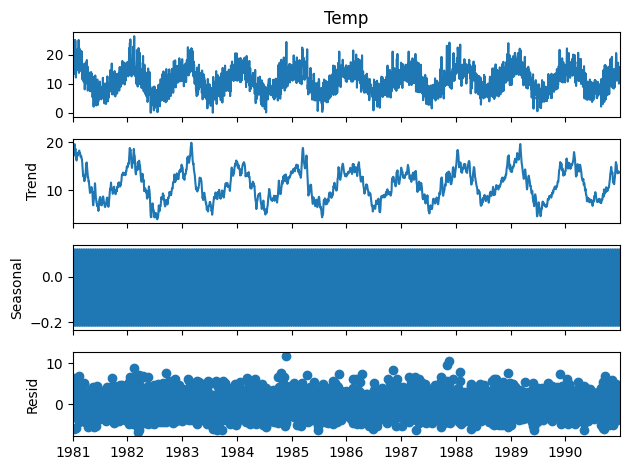

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df['Temp'], model="additive", period=12)
decomp.plot()
plt.show()

Text(0.5, 1.0, 'autocorrelation plot')

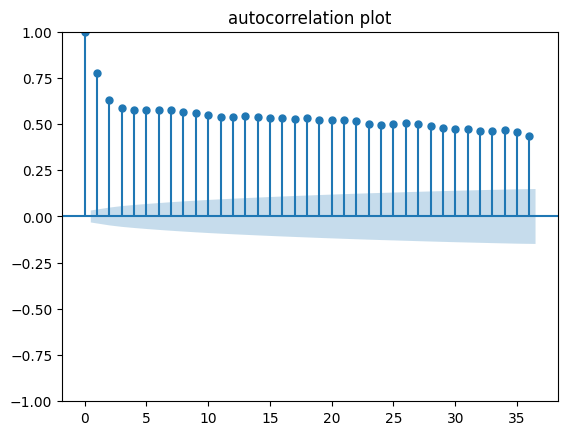

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Temp'].dropna())
plt.title('autocorrelation plot')

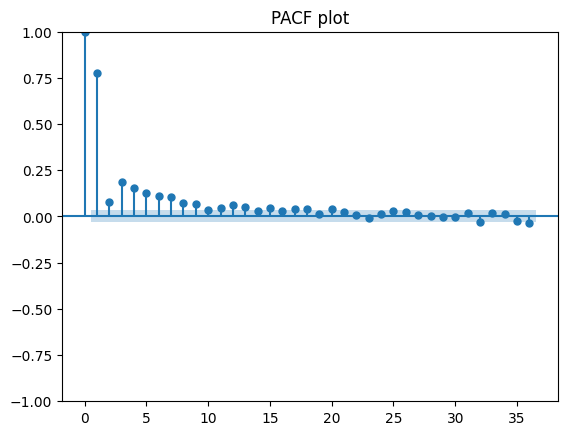

In [72]:
plot_pacf(df['Temp'].dropna())
plt.title('PACF plot')
plt.show()